# Import
- https://towardsdatascience.com/clustering-made-easy-with-pycaret-656316c0b080

In [1]:
# !pip install --user --upgrade tables
# !pip install --user pycaret
# !pip install pycaret[full]==2.3.4
!pip install pycaret
!pip install pandas scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.3

workaround with pycaret and joblib:
- https://github.com/googlecolab/colabtools/issues/4503
- https://github.com/pycaret/pycaret/issues/3959 (THIS ONE)

In [2]:
# !pip install --upgrade joblib
# !pip install --pre pycaret
# !pip install python==3.9.13
# !pip install pycaret==3.0.4
!pip install joblib==1.3.0
!pip install pycaret==3.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.9/301.9 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.3.2
    Uninstalling joblib-1.3.2:
      Successfully uninstalled joblib-1.3.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: pycaret
    Found existing installation: pycaret 3.3.2
    Uninstalling pycaret-3.3.2:
      Successfully uninstalled pycaret-3.3.2


# get libs

In [3]:
# Import libraries
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.clustering import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

Mounted at /content/drive


In [4]:
csv_file_path = '/content/drive/MyDrive/MS thesis/HFCAI/RG8/rg8_HCFAI_sum.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
df.sort_values(by='HCFAI', ascending=False).head(2)

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI
1424,3218279,Dobdob,Valencia (Luzurriaga),Negros Oriental,0.189079,0.705259,0.904475,1.0,0,1,1,3233482,16.696912,9.833628,5.736283,77.689213,37.392719,16.870371,14.643552,0.630610
1348,3216895,Dobdob,Valencia (Luzurriaga),Negros Oriental,0.189079,0.705259,0.904475,1.0,0,1,1,3222413,17.030123,39.814530,19.673070,300.950970,139.819260,62.063820,62.063820,0.630435


In [5]:
for i in df.columns:
  print(i)

ID
barangay_name
city_name
province_name
flood_probability_value
rain intensity_value
drought_value
buildability_landcov
RHU_Presence
Road_Presence
POI_Presence
Nearest_RHU
Distance_to_Nearest_RHU_km
popden_chi
popden_eld
popden_all
popden_wom
popden_w_1
popden_you
HCFAI


# K-means on HCFAI

## Train

In [6]:
IDonly = df['ID']
IDdf = IDonly.to_frame()
IDdf

,ID
0,3164370
1,3164371
2,3164372
3,3165752
4,3165753
...,...
6928,3378537
6929,3378538
6930,3379915
6931,3381299


In [7]:
HCIdf = df[['HCFAI']]
# HCIdf = HCIdf.to_frame()
cluster = setup(HCIdf, session_id = 7652)

,Description,Value
0,Session id,7652
1,Original data shape,"(6933, 1)"
2,Transformed data shape,"(6933, 1)"
3,Numeric features,1
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


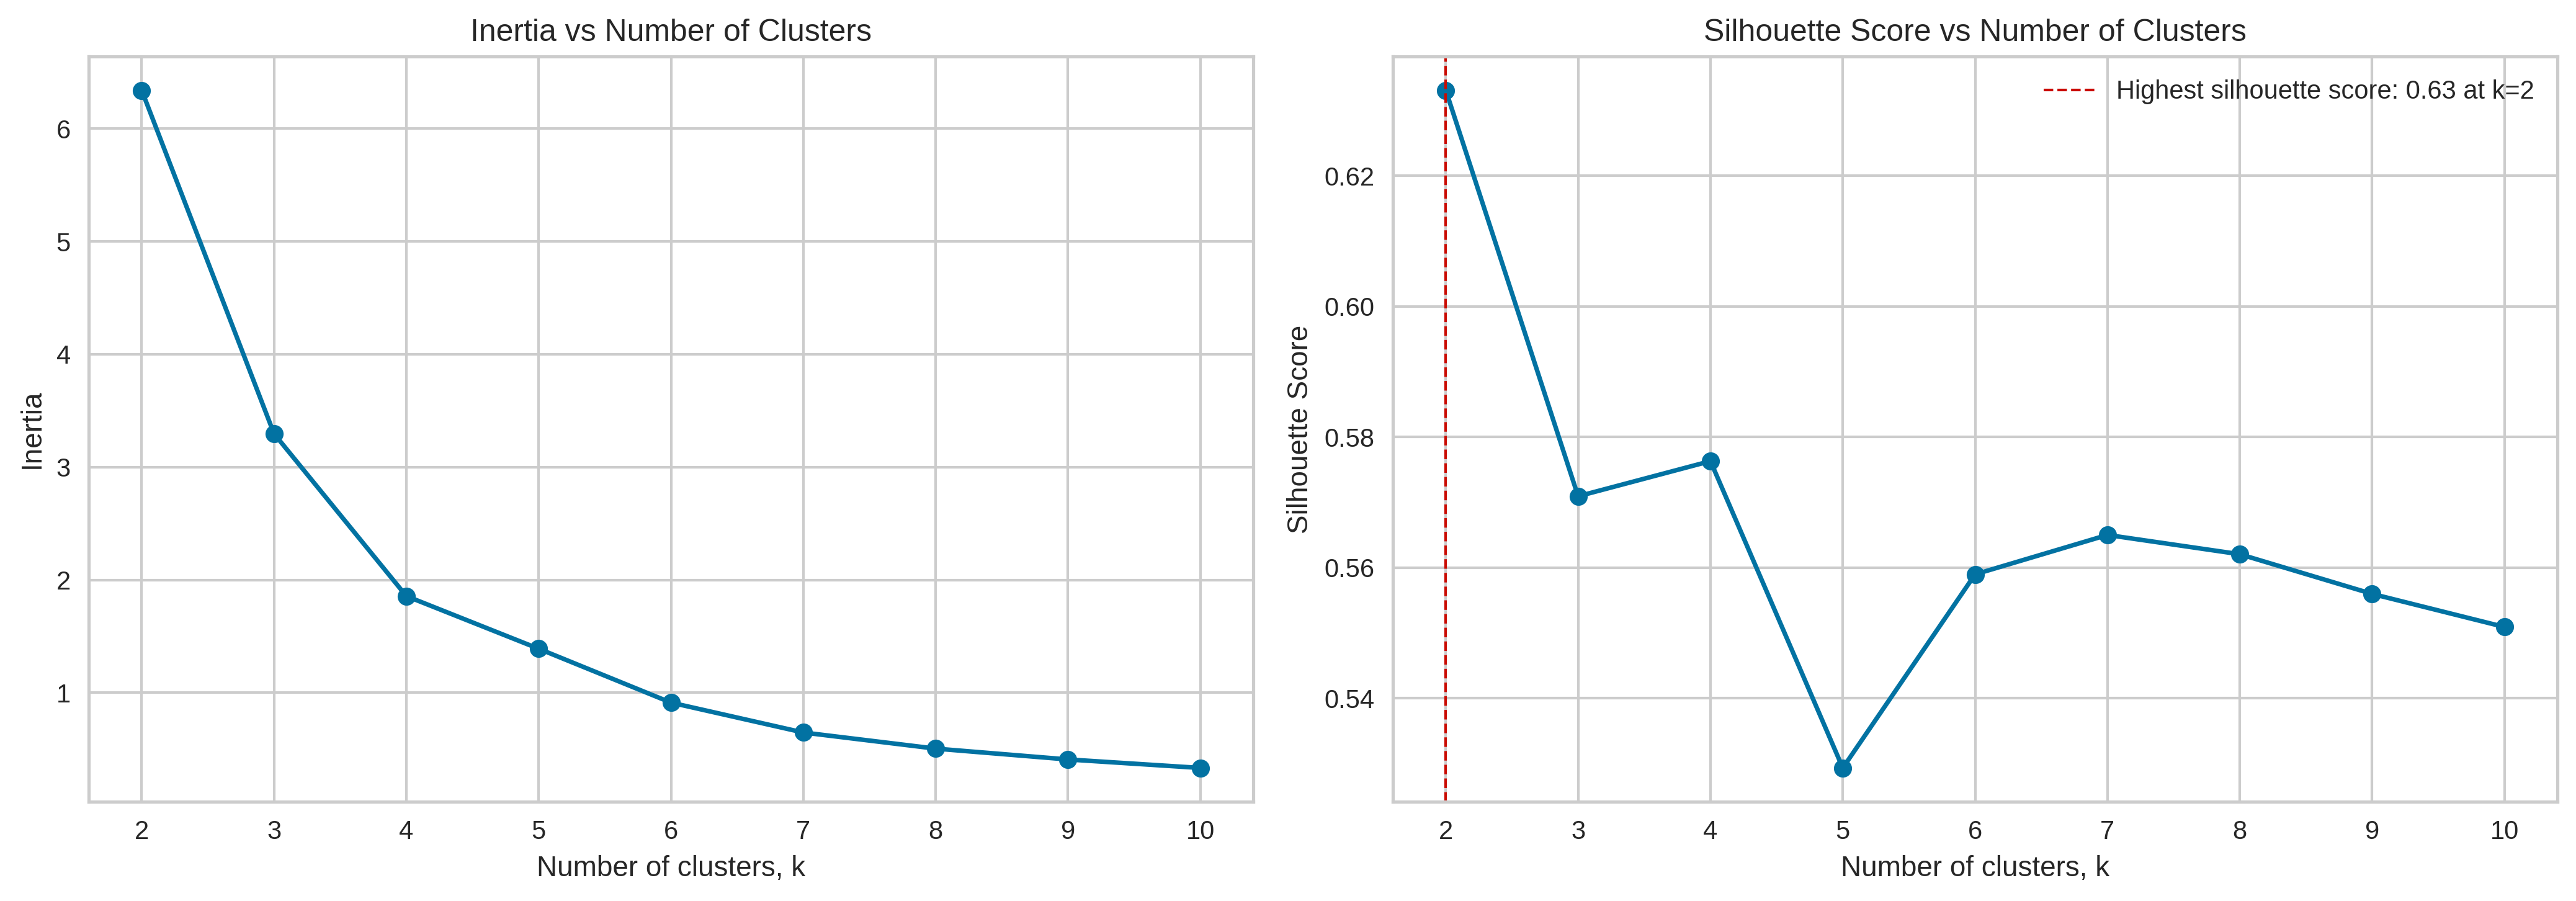

In [8]:
# Initialize lists to store inertia and silhouette scores
k_values = range(2, 11)
inertia_values = []
silhouette_scores = []

for k in k_values:
    # Create KMeans model
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(HCIdf)

    # Calculate inertia
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

    # Calculate silhouette score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(HCIdf, labels)
    silhouette_scores.append(silhouette_avg)

max_silhouette_score = max(silhouette_scores)
min_intertia_score = min(inertia_values)
max_silhouette_k = k_values[silhouette_scores.index(max_silhouette_score)]
min_intertia_k = k_values[inertia_values.index(min_intertia_score)]

# Plot the results
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
# plt.axvline(x=min_intertia_k, color='b', linestyle='--', linewidth=1, label=f'Lowest intertia score: {min_intertia_k:.2f} at k={min_intertia_k}')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.axvline(x=max_silhouette_k, color='r', linestyle='--', linewidth=1, label=f'Highest silhouette score: {max_silhouette_score:.2f} at k={max_silhouette_k}')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5762,23318.5734,0.5004,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

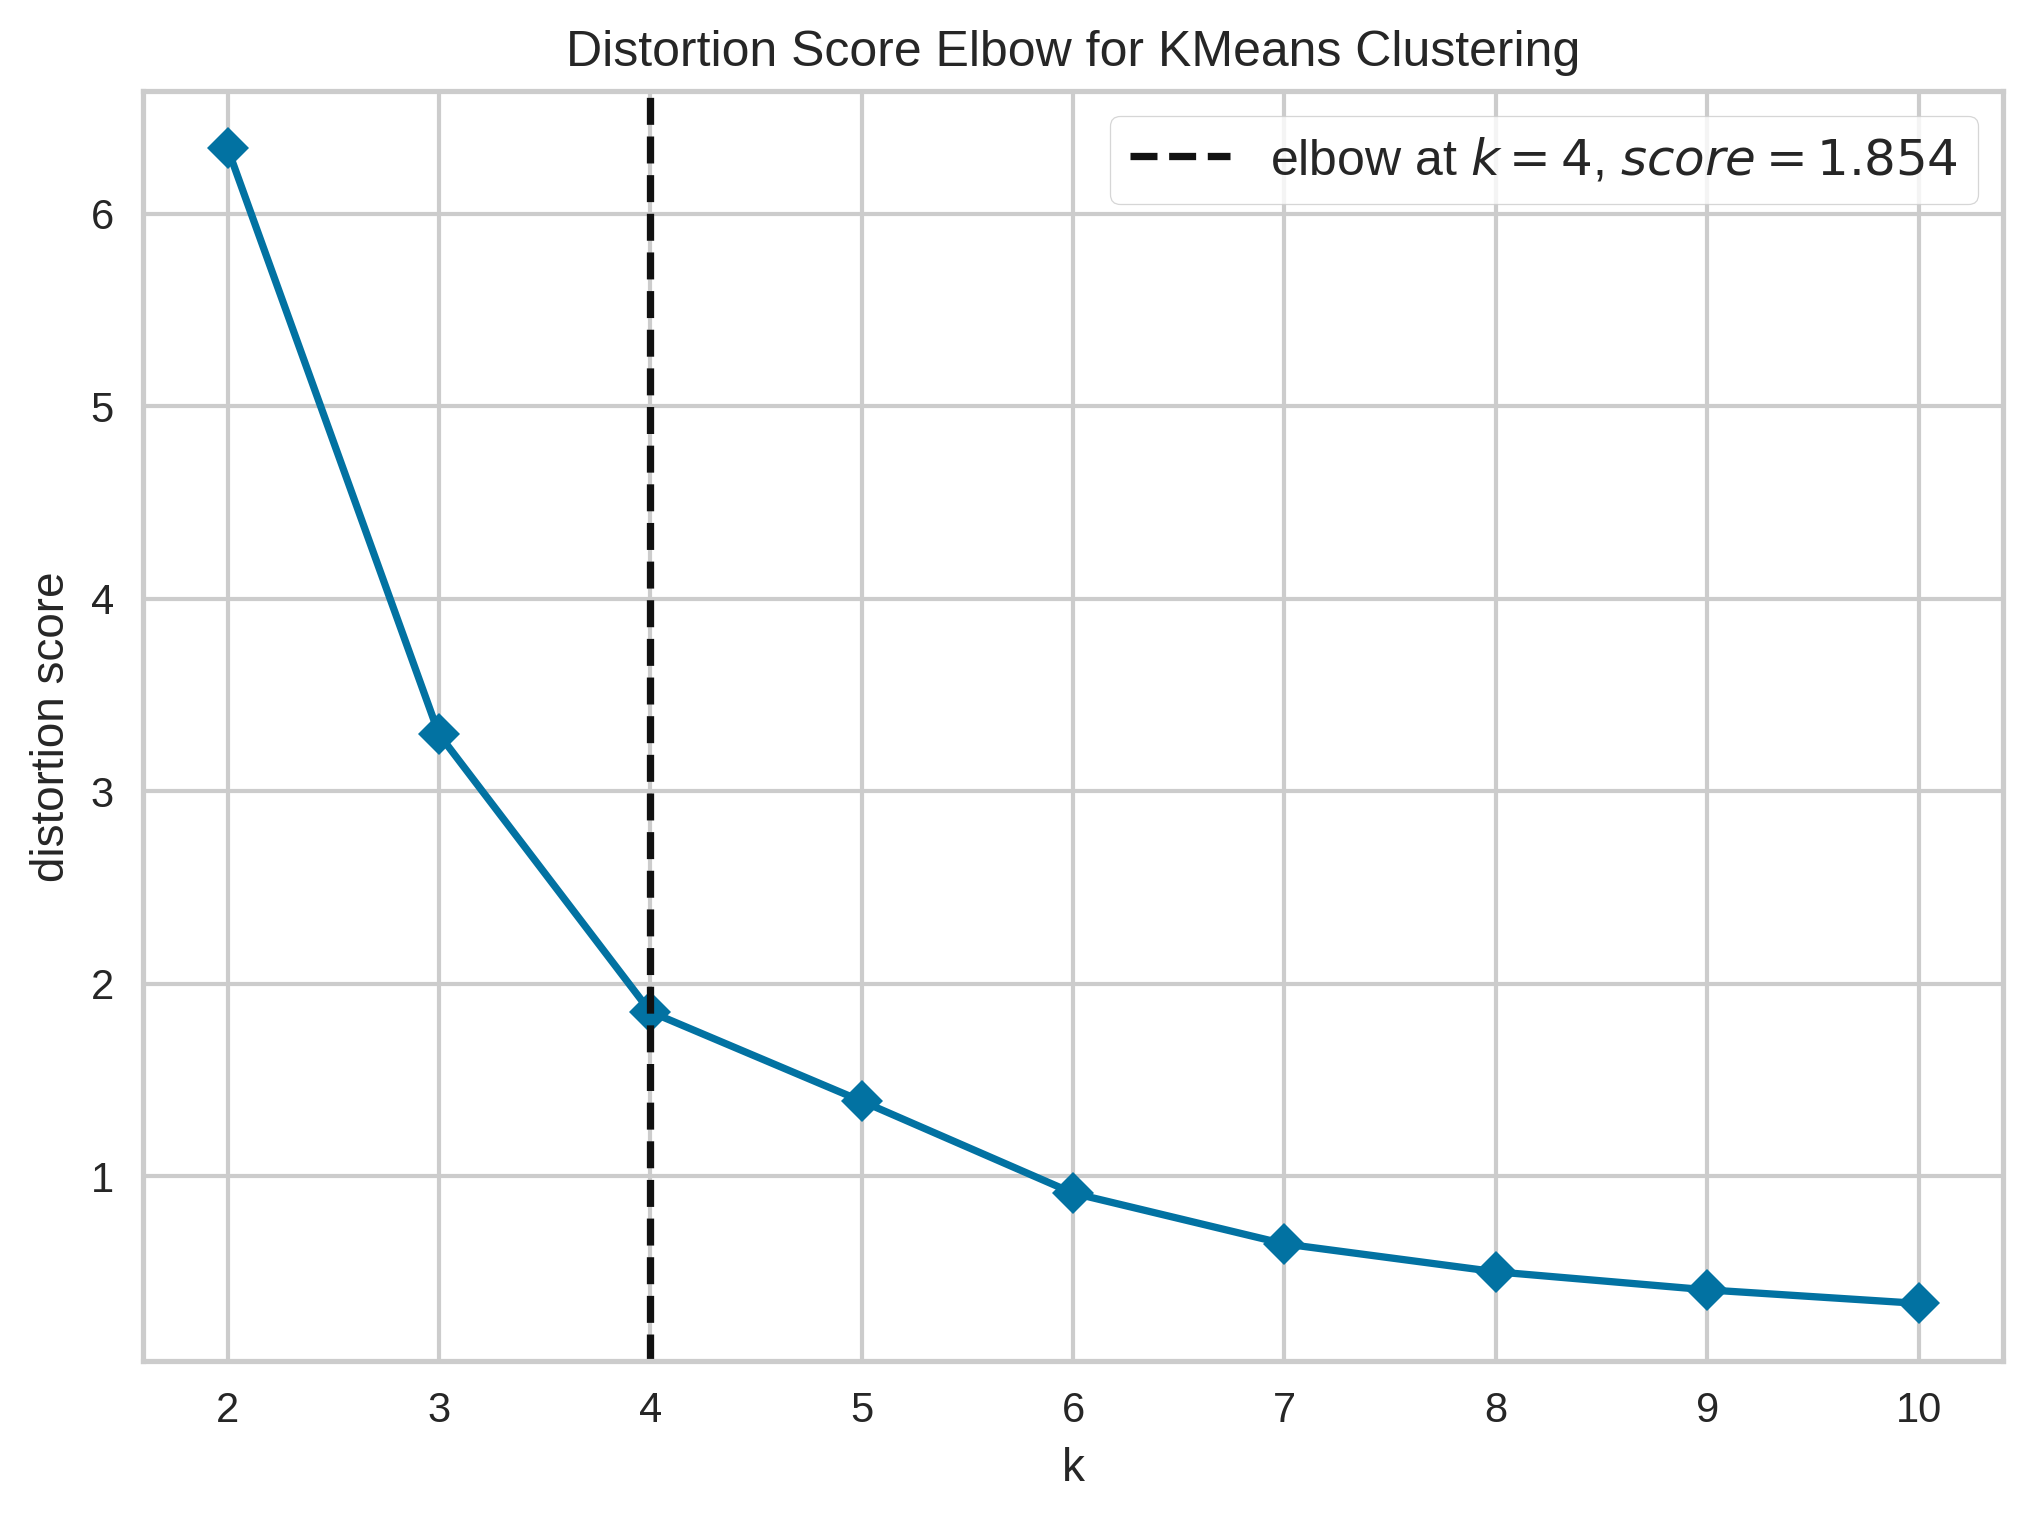

In [10]:
plot_model(model, 'elbow')

### K-means clustering model validation:
1. Intertia score
2. Silhouette score

```
Refer to comments from panel
```



In [11]:
# Evaluate the model
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Apply model on data

In [12]:
model = create_model('kmeans', num_clusters = 2)
plot_model(model,  plot = 'distribution')
# plot_model(model, 'cluster')
save_model(model, '/content/drive/MyDrive/MS thesis/preliminary site selection/RG8/RG8-HCFAI-Clusters-silhouette')
HCFAIdf_results = assign_model(model)
HCFAIdf_results.head(10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6331,15559.5094,0.4984,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


,HCFAI,Cluster
0,0.462771,Cluster 0
1,0.462771,Cluster 0
2,0.462771,Cluster 0
3,0.462771,Cluster 0
4,0.462773,Cluster 0
5,0.465776,Cluster 0
6,0.512405,Cluster 0
7,0.500000,Cluster 0
8,0.500000,Cluster 0
9,0.500000,Cluster 0


In [13]:
model = create_model('kmeans', num_clusters = 4)
plot_model(model,  plot = 'distribution')
# plot_model(model, 'cluster')
save_model(model, '/content/drive/MyDrive/MS thesis/preliminary site selection/RG8/RG8-HCFAI-Clusters-inertia')
HCFAIdf_results = assign_model(model)
HCFAIdf_results.head(10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5762,23318.5734,0.5004,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


,HCFAI,Cluster
0,0.462771,Cluster 3
1,0.462771,Cluster 3
2,0.462771,Cluster 3
3,0.462771,Cluster 3
4,0.462773,Cluster 3
5,0.465776,Cluster 3
6,0.512405,Cluster 0
7,0.500000,Cluster 0
8,0.500000,Cluster 0
9,0.500000,Cluster 0


# Fixing df for BPNN to find candidate locations

In [ ]:
HCFAIdf_results

,HCFAI,Cluster
0,0.462771,Cluster 3
1,0.462771,Cluster 3
2,0.462771,Cluster 3
3,0.462771,Cluster 3
4,0.462773,Cluster 3
...,...,...
6928,0.354813,Cluster 1
6929,0.500000,Cluster 0
6930,0.398998,Cluster 1
6931,0.401690,Cluster 1


In [ ]:
HCFAIdf_results.rename(columns={'Cluster': 'Accessibility Level'}, inplace=True)

lists = {}

for cluster_number in range(len(HCFAIdf_results['Accessibility Level'].unique())):  # Assuming you have 3 clusters
  cluster_name = f"Cluster {cluster_number}"
  cluster_list = HCFAIdf_results.loc[HCFAIdf_results['Accessibility Level'] == cluster_name, 'HCFAI'].tolist()
  lists[cluster_name] = cluster_list

for cluster_name, cluster_list in lists.items():
    # print(f"Cluster {cluster_name}: {cluster_list}")
    print(f"max, min, total {max(cluster_list)} | {min(cluster_list)} | {len(cluster_list)}")

x = HCFAIdf_results['HCFAI'].notna() # removing nan values
x = HCFAIdf_results[x]
x.sort_values(by='HCFAI', ascending=False)

max, min, total 0.5246366858482361 | 0.475828617811203 | 2976
max, min, total 0.42011627554893494 | 0.3416353762149811 | 1382
max, min, total 0.6306096911430359 | 0.5246703028678894 | 985
max, min, total 0.47574731707572937 | 0.4202703535556793 | 1590


,HCFAI,Accessibility Level
1424,0.630610,Cluster 2
1348,0.630435,Cluster 2
1753,0.629775,Cluster 2
2714,0.624912,Cluster 2
2672,0.624012,Cluster 2
...,...,...
6831,0.345727,Cluster 1
6830,0.345710,Cluster 1
4361,0.345029,Cluster 1
4434,0.343014,Cluster 1


In [ ]:
x = x.replace(['Cluster 0'],int(0))
x = x.replace(['Cluster 1'],int(0))
x = x.replace(['Cluster 2'],int(1))
x = x.replace(['Cluster 3'],int(0))

x['ID'] = IDdf

df = df.merge(x, how='left', on='ID')
df = df.drop_duplicates('ID')
# df = df.drop(['Accessibility Level_x','Accessibility Level_y'], axis=1)
df.rename(columns = {'Accessibility Level':'Cluster', 'HCFAI_y': 'HCFAI'}, inplace = True)
# df[df['Cluster'] == 1]
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI_x,HCFAI,Cluster
0,3164370,Bongalonan,Basay,Negros Oriental,1.452462,0.591717,1.018066,1.0,0,0,...,25.971035,2.432361,1.263453,22.647606,10.803811,5.199925,4.916292,0.462771,0.462771,0
1,3164371,Bongalonan,Basay,Negros Oriental,1.452462,0.591717,1.018066,1.0,0,0,...,25.450296,2.432361,1.263453,22.647606,10.803811,5.199925,4.916292,0.462771,0.462771,0
2,3164372,Bongalonan,Basay,Negros Oriental,1.452462,0.591717,1.018066,1.0,0,0,...,25.225533,2.270979,1.179626,21.144988,10.087002,4.854922,4.590107,0.462771,0.462771,0
3,3165752,Bongalonan,Basay,Negros Oriental,1.452462,0.591717,1.018066,1.0,0,0,...,25.398884,7.297083,3.790359,67.942818,32.411433,15.599775,14.748876,0.462771,0.462771,0
4,3165753,Bongalonan,Basay,Negros Oriental,1.452462,0.591717,1.018066,1.0,0,0,...,25.042725,14.594166,7.580718,135.885636,64.822866,31.199550,29.497752,0.462773,0.462773,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6928,3378537,Kabangkalan,President Carlos P. Garcia (Pitogo),Bohol,1.441086,1.606593,0.626593,0.0,0,0,...,27.636793,15.761890,20.611718,124.882748,54.560412,19.399278,10.103780,0.354813,0.354813,0
6929,3378538,Kabangkalan,President Carlos P. Garcia (Pitogo),Bohol,1.441086,1.606593,0.626593,0.0,0,0,...,26.548798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
6930,3379915,Tugas,President Carlos P. Garcia (Pitogo),Bohol,1.357690,1.614995,0.555917,0.0,0,0,...,31.655614,42.033024,33.949728,298.272744,140.244768,61.028712,46.074672,0.398998,0.398998,0
6931,3381299,Tilmobo,President Carlos P. Garcia (Pitogo),Bohol,0.008577,1.612559,0.604537,0.0,0,0,...,31.801069,8.558496,16.641520,93.668000,45.169856,16.166048,16.641520,0.401690,0.401690,0


In [ ]:
df.columns

Index(['ID', 'barangay_name', 'city_name', 'province_name',
       'flood_probability_value', 'rain intensity_value', 'drought_value',
       'buildability_landcov', 'RHU_Presence', 'Road_Presence', 'POI_Presence',
       'Nearest_RHU', 'Distance_to_Nearest_RHU_km', 'popden_chi', 'popden_eld',
       'popden_all', 'popden_wom', 'popden_w_1', 'popden_you', 'HCFAI_x',
       'HCFAI', 'Cluster'],
      dtype='object')

In [ ]:
df = df.drop(['HCFAI_x'], axis=1)
df.rename(columns = {'Accessibility Level_x':'Cluster'}, inplace = True)
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI,Cluster
0,3164370,Bongalonan,Basay,Negros Oriental,1.452462,0.591717,1.018066,1.0,0,0,...,3187871,25.971035,2.432361,1.263453,22.647606,10.803811,5.199925,4.916292,0.462771,0
1,3164371,Bongalonan,Basay,Negros Oriental,1.452462,0.591717,1.018066,1.0,0,0,...,3187871,25.450296,2.432361,1.263453,22.647606,10.803811,5.199925,4.916292,0.462771,0
2,3164372,Bongalonan,Basay,Negros Oriental,1.452462,0.591717,1.018066,1.0,0,0,...,3187871,25.225533,2.270979,1.179626,21.144988,10.087002,4.854922,4.590107,0.462771,0
3,3165752,Bongalonan,Basay,Negros Oriental,1.452462,0.591717,1.018066,1.0,0,0,...,3187871,25.398884,7.297083,3.790359,67.942818,32.411433,15.599775,14.748876,0.462771,0
4,3165753,Bongalonan,Basay,Negros Oriental,1.452462,0.591717,1.018066,1.0,0,0,...,3187871,25.042725,14.594166,7.580718,135.885636,64.822866,31.199550,29.497752,0.462773,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6928,3378537,Kabangkalan,President Carlos P. Garcia (Pitogo),Bohol,1.441086,1.606593,0.626593,0.0,0,0,...,3370261,27.636793,15.761890,20.611718,124.882748,54.560412,19.399278,10.103780,0.354813,0
6929,3378538,Kabangkalan,President Carlos P. Garcia (Pitogo),Bohol,1.441086,1.606593,0.626593,0.0,0,0,...,3370261,26.548798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
6930,3379915,Tugas,President Carlos P. Garcia (Pitogo),Bohol,1.357690,1.614995,0.555917,0.0,0,0,...,3348130,31.655614,42.033024,33.949728,298.272744,140.244768,61.028712,46.074672,0.398998,0
6931,3381299,Tilmobo,President Carlos P. Garcia (Pitogo),Bohol,0.008577,1.612559,0.604537,0.0,0,0,...,3370261,31.801069,8.558496,16.641520,93.668000,45.169856,16.166048,16.641520,0.401690,0


In [ ]:
df.to_csv(r'/content/drive/MyDrive/MS thesis/preliminary site selection/RG8/rg8_clusters.csv')